In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Now this will work after installation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [7]:
df = pd.read_csv("pain_ap_difference_dataset.csv")
df.head()


,label,dV_0,dV_1,dV_2,dV_3,dV_4,dV_5,dV_6,dV_7,dV_8,...,dV_1190,dV_1191,dV_1192,dV_1193,dV_1194,dV_1195,dV_1196,dV_1197,dV_1198,dV_1199
0,0.0,0.0,0.010203,0.155627,0.203095,0.184031,0.187743,0.208626,0.246225,0.288426,...,0.354504,0.354504,0.354504,0.354504,0.354504,0.354504,0.354504,0.354504,0.354504,0.354504
1,0.0,0.0,0.000407,0.006234,0.008189,0.007417,0.007544,0.008394,0.009937,0.011667,...,0.014355,0.014355,0.014355,0.014355,0.014355,0.014355,0.014355,0.014355,0.014355,0.014355
2,0.0,0.0,0.009695,0.147903,0.193081,0.174952,0.178453,0.198317,0.234094,0.274248,...,0.337098,0.337098,0.337098,0.337098,0.337098,0.337098,0.337098,0.337098,0.337098,0.337098
3,0.0,0.0,0.012774,0.194665,0.253598,0.229829,0.234648,0.260657,0.307394,0.359863,...,0.442175,0.442175,0.442175,0.442175,0.442175,0.442175,0.442175,0.442175,0.442175,0.442175
4,0.0,0.0,-0.000674,-0.010327,-0.013577,-0.012296,-0.012502,-0.013913,-0.016475,-0.019349,...,-0.023811,-0.023811,-0.023811,-0.023811,-0.023811,-0.023811,-0.023811,-0.023811,-0.023811,-0.023811


In [8]:
print("Shape:", df.shape)
print("\nLabel distribution:")
print(df['label'].value_counts())


Shape: (1500, 1201)

Label distribution:
label
0.0    150
1.0    150
2.0    150
3.0    150
4.0    150
5.0    150
6.0    150
7.0    150
8.0    150
9.0    150
Name: count, dtype: int64


In [9]:
df.isna().sum().sum()


0

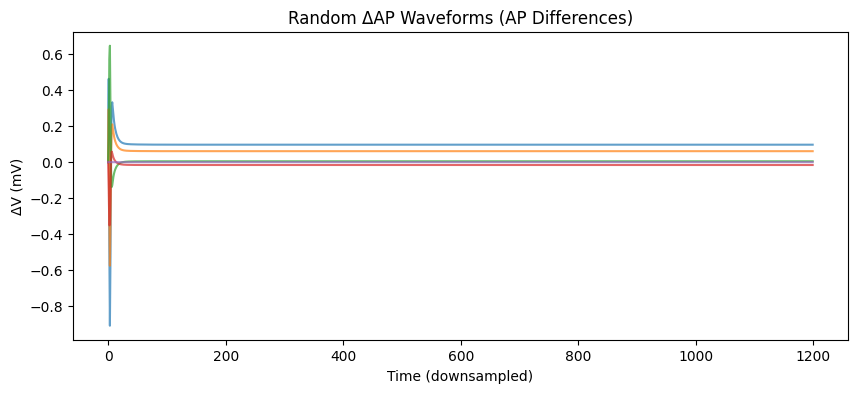

In [10]:
feature_cols = df.columns[1:]

plt.figure(figsize=(10,4))
for i in range(5):
    row = df.sample(1)
    plt.plot(row[feature_cols].values.flatten(), alpha=0.7)

plt.title("Random ΔAP Waveforms (AP Differences)")
plt.xlabel("Time (downsampled)")
plt.ylabel("ΔV (mV)")
plt.show()


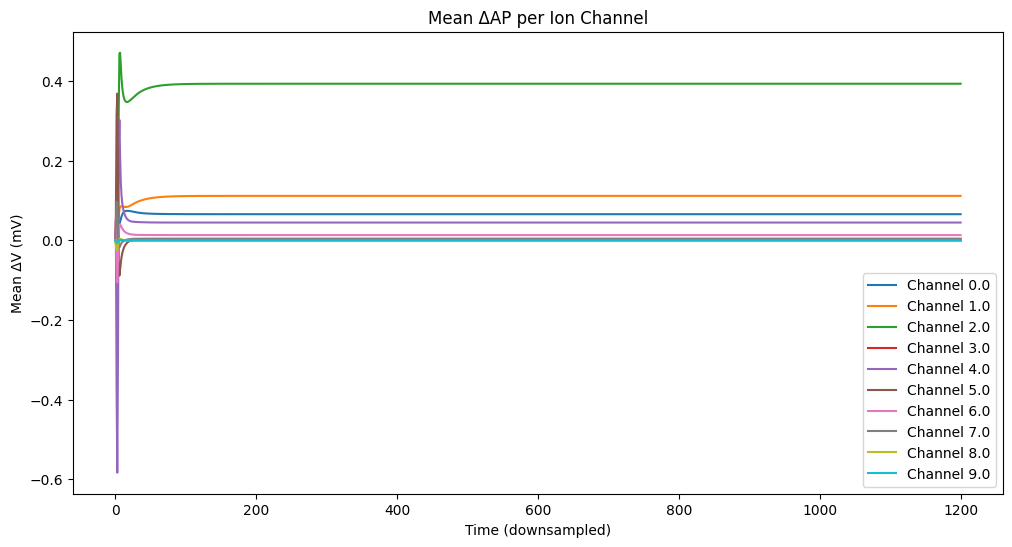

In [11]:
plt.figure(figsize=(12,6))

for label in sorted(df['label'].unique()):
    mean_trace = df[df['label'] == label][feature_cols].mean().values
    plt.plot(mean_trace, label=f"Channel {label}")

plt.legend()
plt.title("Mean ΔAP per Ion Channel")
plt.xlabel("Time (downsampled)")
plt.ylabel("Mean ΔV (mV)")
plt.show()


In [12]:
X = df[feature_cols].values
y = df['label'].values

num_classes = len(np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train_oh = to_categorical(y_train, num_classes)
y_test_oh = to_categorical(y_test, num_classes)


In [14]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\divya\anaconda3\envs\py3-TF2.0\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 341,642 (1.30 MB)

 Trainable params: 341,642 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,              # stop after 5 bad epochs
    restore_best_weights=True,
    verbose=1
)
history = model.fit(
    X_train, y_train_oh,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7343 - loss: 0.6296 - val_accuracy: 0.7583 - val_loss: 0.5304
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7195 - loss: 0.6738 - val_accuracy: 0.7500 - val_loss: 0.5546
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7133 - loss: 0.7202 - val_accuracy: 0.7625 - val_loss: 0.5452
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7412 - loss: 0.6408 - val_accuracy: 0.7333 - val_loss: 0.5612
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6966 - loss: 0.8039 - val_accuracy: 0.7333 - val_loss: 0.5622
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7073 - loss: 0.7028 - val_accuracy: 0.7500 - val_loss: 0.5875
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7197 - loss: 0.6733 - val_accuracy: 0.7292 - val_loss: 0.5502
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7274 - loss: 0.6515 - val_accuracy: 0.

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test_oh, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.7600


In [23]:
y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81        30
         1.0       0.81      0.87      0.84        30
         2.0       1.00      0.77      0.87        30
         3.0       0.79      1.00      0.88        30
         4.0       1.00      1.00      1.00        30
         5.0       1.00      0.90      0.95        30
         6.0       1.00      1.00      1.00        30
         7.0       0.78      0.47      0.58        30
         8.0       0.32      0.30      0.31        30
         9.0       0.33      0.43      0.37        30

    accuracy                           0.76       300
   macro avg       0.78      0.76      0.76       300
weighted avg       0.78      0.76      0.76       300



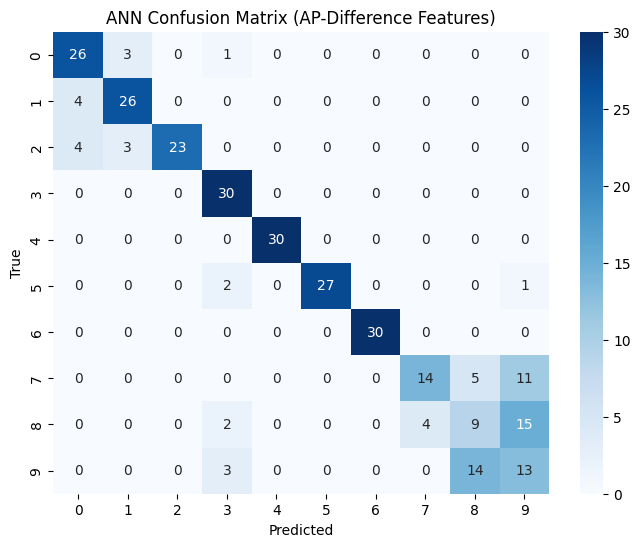

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("ANN Confusion Matrix (AP-Difference Features)")
plt.show()
